In [1]:
!pwd

/pscratch/sd/n/nishank/scripts


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import gridspec
import argparse
import h5py as h5
import os
import utils
import tensorflow as tf
from GSGM_uniform import GSGM
from deepsets_cond import DeepSetsAttClass
import time
import gc
import sys
from sklearn.metrics import roc_curve, auc



processes = ['gluon_tagging']
config = utils.LoadJson('config_AD.json')
npart = 100
nll_qcd = {}
#model_gluon = GSGM(config=config,npart=npart,particle='gluon_tagging',ll_training=True) MY OLD MODEL
model_gluon = GSGM(config=config,npart=npart,particle='gluon_tagging',ll_training=False)
#checkpoint_folder_gluon = '../checkpoints_{}/checkpoint'.format('GSGM_ll'+ '_gluon_tagging')  MY FILE PATH FOR MY TRAINED MODEL
checkpoint_folder_gluon = '/global/cfs/cdirs/m3246/vmikuni/for_nishank/checkpoints_{}/checkpoint'.format('GSGM'+ '_gluon_tagging')
model_gluon.load_weights('{}'.format(checkpoint_folder_gluon)).expect_partial()

model_top = GSGM(config=config,npart=npart,particle='top_tagging',ll_training=False)
checkpoint_folder_top = '/global/cfs/cdirs/m3246/vmikuni/for_nishank/checkpoints_{}/checkpoint'.format('GSGM'+ '_top_tagging')
model_top.load_weights('{}'.format(checkpoint_folder_top)).expect_partial()

    #changed
    # model_top = GSGM(config=config,npart=npart,particle='top_tagging',ll_training=flags.ll)
    # checkpoint_folder_top = '../checkpoints_{}/checkpoint'.format(model_name+ '_top_tagging')
    # model_top.load_weights('{}'.format(checkpoint_folder_top)).expect_partial()
    # nll_top = {}


#gluon_parts, gluon_jets, init_noise_parts, init_noise_jets, mask_gluon = model_gluon.generate(1000)


#generate gluons first
#top_parts, top_jets,top_init_noise_parts,top_init_noise_jets, mask_top = model_top.generate(1000)


#create particles
#gluon_jets,init_noise_jets, mask = model_gluon.generate(200000)
#top_jets,top_init_noise_jets, top_mask = model_top.generate(200000)
#nll_qcd[process] = evaluate(model_gluon,particles,jets,mask,flags.nidx)
#nll_top[process] = evaluate(model_top,particles,jets,mask,flags.nidx)

#data_size,training_data,test_data = utils.DataLoader('/pscratch/sd/n/nishank/data/TOPTAGGING',
#                                                     ['gluon_tagging.h5'],'gluon_tagging', make_tf_data=False)

#ADDED CODE 1/10/2024
# plt.hist(init_noise_jets.numpy().flatten(), bins=50, alpha=0.7, label='Initial Particle Noise')
# plt.xlabel('Initial Noise Value')
# plt.ylabel('Number of Events')
# plt.title('Histogram of Initial Jet Noise')
# plt.legend()
# plt.show()
#END ADDED CODE 1/10/2024

#ADDED CODE 1/10/2024
# plt.hist(gluon_jets.flatten(), bins=50, alpha=0.7, label='Generated Particle Data')
# plt.xlabel('Generated Particle Value')
# plt.ylabel('Number of Events')
# plt.title('Histogram of Generated Jet Data')
# plt.legend()
# plt.show()
#END ADDED CODE 1/10/2024


#log (p(jets)) * log(P(jets given particles))


#ADDED CODE 1/10/2024
# plt.hist(final_noise_jets.flatten(), bins=50, alpha=0.7, label='Final Particle Noise')
# plt.xlabel('Final Noise Value')
# plt.ylabel('Number of Events')
# plt.title('Histogram of Final Jet Noise')
# plt.legend()
# plt.show()
#END ADDED CODE 1/10/2024

2024-03-12 17:41:15.785090: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-12 17:41:18.250981: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78933 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:03:00.0, compute capability: 8.0
2024-03-12 17:41:18.258328: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 78933 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2024-03-12 17:41:18.259802: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

In [3]:
#just doing particle generation here
gluon_parts, gluon_jets, init_noise_parts, init_noise_jets, mask_gluon = model_gluon.generate(20000)
with h5.File(os.path.join('/pscratch/sd/n/nishank/scripts/generated_gluon',
                              'gluon_tagging_data6.h5'),"w") as h5f:
        dset = h5f.create_dataset("gluon_parts", data=gluon_parts)
        dset = h5f.create_dataset("gluon_jets", data=gluon_jets)
        dset = h5f.create_dataset("init_noise_parts", data=init_noise_parts)
        dset = h5f.create_dataset("init_noise_jets", data=init_noise_jets)
        dset = h5f.create_dataset("mask_gluon", data=mask_gluon)

2024-03-05 23:46:43.608812: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Time for sampling 20000 events is 2.0774085521698 seconds
Time for sampling 20000 events is 264.93266582489014 seconds


In [6]:
top_parts, top_jets,top_init_noise_parts,top_init_noise_jets, mask_top = model_top.generate(40000)
with h5.File(os.path.join('/pscratch/sd/n/nishank/scripts/generated_top',
                              'top_tagging_data5.h5'),"w") as h5f:
        dset = h5f.create_dataset("top_parts", data=top_parts)
        dset = h5f.create_dataset("top_jets", data=top_jets)
        dset = h5f.create_dataset("top_init_noise_parts", data=top_init_noise_parts)
        dset = h5f.create_dataset("top_init_noise_jets", data=top_init_noise_jets)
        dset = h5f.create_dataset("mask_top", data=mask_top)

Time for sampling 40000 events is 1.264275074005127 seconds
Time for sampling 40000 events is 778.5770401954651 seconds


In [ ]:
for i in range(5):
    #clear up space
    gluon_parts, gluon_jets, init_noise_parts, init_noise_jets, mask_gluon = 0, 0, 0, 0, 0
    ll_gluon_parts, final_noise_parts = 0, 0
    ll_top_parts, final_noise_parts = 0, 0
    
    gluon_parts, gluon_jets, init_noise_parts, init_noise_jets, mask_gluon = model_gluon.generate(100)
    start_time = time.time()
    #call this directly after gluons:
    ll_gluon_parts, final_noise_parts = model_gluon.Likelihood(gluon_parts.numpy(), model_gluon.ema_part,
                                                               gluon_jets.numpy(),mask_gluon.astype(np.float32))
    time1 = time.time()
    print('Time for Gluon Model:', time1 - start_time)
    ll_top_parts, final_noise_parts = model_top.Likelihood(gluon_parts.numpy(), model_top.ema_part,
                                                               gluon_jets.numpy(),mask_gluon.astype(np.float32))
    time2 = time.time()
    print('Time for Top Model:', time2 - time1)
    #save the gluon data
    with h5.File(os.path.join('/pscratch/sd/n/nishank/scripts/saved_gluon_data',
                              'gluon_parts_and_ll_{}.h5'.format(i)),"w") as h5f:
        dset = h5f.create_dataset("gluon_parts", data=gluon_parts)
        dset = h5f.create_dataset("gluon_jets", data=gluon_jets)
        dset = h5f.create_dataset("ll_gluon_parts_gluon", data=ll_gluon_parts)
        dset = h5f.create_dataset("ll_top_parts_gluon", data=ll_top_parts)

In [ ]:
import time
for i in range(80):
    #clear up space
    top_parts, top_jets,top_init_noise_parts,top_init_noise_jets, mask_top = 0, 0, 0, 0, 0
    ll_gluon_parts_top, final_noise_parts = 0, 0
    ll_top_parts_top, final_noise_parts = 0, 0
    start_time = time.time()
    
    top_parts, top_jets,top_init_noise_parts,top_init_noise_jets, mask_top = model_top.generate(2500)
    
    ll_gluon_parts_top, final_noise_parts = model_gluon.Likelihood(top_parts.numpy(), model_gluon.ema_part,
                                                           top_jets.numpy(),mask_top.astype(np.float32))
    time1 = time.time()
    print('Time for Gluon Model:', time1 - start_time)
    ll_top_parts_top, final_noise_parts = model_top.Likelihood(top_parts.numpy(), model_top.ema_part,
                                                            top_jets.numpy(),mask_top.astype(np.float32))
    time2 = time.time()
    print('Time for Top Model:', time2 - time1)
    with h5.File(os.path.join('/pscratch/sd/n/nishank/scripts/saved_top_data',
                              'top_parts_and_ll_{}.h5'.format(i)),"w") as h5f:
        dset = h5f.create_dataset("top_parts", data=top_parts)
        dset = h5f.create_dataset("top_jets", data=top_jets)
        dset = h5f.create_dataset("ll_gluon_parts_top", data=ll_gluon_parts_top)
        dset = h5f.create_dataset("ll_top_parts_top", data=ll_top_parts_top)

In [ ]:
#call this directly after gluons:
ll_gluon_parts, final_noise_parts = model_gluon.Likelihood(gluon_parts.numpy(), model_gluon.ema_part,
                                                           gluon_jets.numpy(),mask_gluon.astype(np.float32))
print('done first')
ll_top_parts, final_noise_parts = model_top.Likelihood(gluon_parts.numpy(), model_top.ema_part,
                                                           gluon_jets.numpy(),mask_gluon.astype(np.float32))
print('finally done')

#call this later after generating the tops:

ll_gluon_parts_top, final_noise_parts = model_gluon.Likelihood(top_parts.numpy(), model_gluon.ema_part,
                                                           gluon_jets.numpy(),mask_top.astype(np.float32))
ll_top_parts_top, final_noise_parts = model_top.Likelihood(top_parts.numpy(), model_top.ema_part,
                                                            gluon_jets.numpy(),mask_top.astype(np.float32))


#ll_gluon_jets, final_noise_jets = model_gluon.Likelihood(gluon_jets, model_gluon.ema_jet)
#ll_top_jets, final_noise_jets_top = model_top.Likelihood(gluon_jets, model_top.ema_jet)
#llr_gluon = ll_top_jets - ll_gluon_jets #plus top parts minus gluon parts

#ll_gluon_jets_top, final_noise_jets_top = model_gluon.Likelihood(top_jets, model_gluon.ema_jet)
#ll_top_jets_top, final_noise_jets_top_top = model_top.Likelihood(top_jets, model_top.ema_jet)
#llr_top = ll_top_jets_top - ll_gluon_jets_top #plus top parts minus gluon parts

In [ ]:
llr_gluon = ll_top_jets - ll_gluon_jets + ll_top_parts - ll_gluon_parts #plus top parts minus gluon parts

llr_top = ll_top_jets_top - ll_gluon_jets_top + ll_top_parts_top - ll_gluon_parts_top #plus top parts minus gluon parts

#make it for particles separately

llr = np.concatenate([llr_top, llr_gluon], 0)
labels = np.concatenate([np.ones(llr_top.shape[0]), np.zeros(llr_gluon.shape[0])], 0)

In [ ]:
fpr, tpr, _ = roc_curve(labels,llr, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr, tpr)))
plt.plot(tpr,fpr,label="ROC Curve of Likelihood Ratio",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

In [ ]:
X = np.concatenate([gluon_jets, top_jets], 0)
Y = np.concatenate([np.array([1 for i in range(200000)]), np.array([0 for i in range(200000)])], 0)

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [ ]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
#CLASSIFIER
#input gluon and top jets and then input the actual labels to train the loss function with 3 or so layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(50, input_dim = len(gluon_jets[0, :]), activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
model.fit(x = X, y = Y, epochs = 128, verbose = 1) 

In [ ]:
prediction = model.predict(X)
print(prediction[:5])

In [ ]:
fpr, tpr, _ = roc_curve(Y,prediction, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr, tpr)))
plt.plot(tpr,fpr,label="ROC Curve of Classifier Accuracy",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
my_acc = accuracy_score(Y, prediction.round())
print(my_acc)

In [9]:
import numpy as np
import h5py as h5

filepaths = [
    '/pscratch/sd/n/nishank/scripts/generated_gluon/gluon_tagging_data.h5',
    '/pscratch/sd/n/nishank/scripts/generated_gluon/gluon_tagging_data2.h5',
    '/pscratch/sd/n/nishank/scripts/generated_gluon/gluon_tagging_data3.h5',
    '/pscratch/sd/n/nishank/scripts/generated_gluon/gluon_tagging_data4.h5',
    '/pscratch/sd/n/nishank/scripts/generated_gluon/gluon_tagging_data5.h5',
    '/pscratch/sd/n/nishank/scripts/generated_gluon/gluon_tagging_data6.h5'
]

gluon_parts_list = []
mask_gluon_list = []
for filepath in filepaths:
    with h5.File(filepath, "r") as h5f:
        particle = h5f['gluon_parts'][()].astype(np.float32)
        mask = h5f['mask_gluon'][()].astype(np.float32)
        gluon_parts_list.append(particle)
        mask_gluon_list.append(mask)
gluon_parts = np.concatenate(gluon_parts_list, axis=0)
mask_gluon = np.concatenate(mask_gluon_list, axis=0)
print(gluon_parts.shape)
print(mask_gluon.shape)

(200000, 100, 3)
(200000, 100, 1)


In [10]:
import numpy as np
import h5py as h5

filepaths = [
    '/pscratch/sd/n/nishank/scripts/generated_top/top_tagging_data.h5',
    '/pscratch/sd/n/nishank/scripts/generated_top/top_tagging_data2.h5',
    '/pscratch/sd/n/nishank/scripts/generated_top/top_tagging_data3.h5',
    '/pscratch/sd/n/nishank/scripts/generated_top/top_tagging_data4.h5',
    '/pscratch/sd/n/nishank/scripts/generated_top/top_tagging_data5.h5',
    '/pscratch/sd/n/nishank/scripts/generated_top/top_tagging_data6.h5'
]

top_parts_list = []
mask_top_list = []
for filepath in filepaths:
    with h5.File(filepath, "r") as h5f:
        particle = h5f['top_parts'][()].astype(np.float32)
        mask = h5f['mask_top'][()].astype(np.float32)
        top_parts_list.append(particle)
        mask_top_list.append(mask)
top_parts = np.concatenate(top_parts_list, axis=0)
mask_top = np.concatenate(mask_top_list, axis=0)
print(top_parts.shape)
print(mask_top.shape)

(200000, 100, 3)
(200000, 100, 1)


In [11]:
num_part = gluon_parts.shape[1]
gluon_parts = gluon_parts.reshape(-1,gluon_parts.shape[-1]) #flatten
mask = mask_gluon.reshape(-1, mask_gluon.shape[-1])[:, 0]
mean_particle = np.average(gluon_parts[:,:],axis=0,weights=mask)
data_dict = {
            'max_particle':np.max(gluon_parts[:,:],0).tolist(),
            'min_particle':np.min(gluon_parts[:,:],0).tolist(),
            'mean_particle':mean_particle.tolist(),
            'std_particle':np.sqrt(np.average((gluon_parts[:,:] - mean_particle)**2,axis=0,weights=mask)).tolist()
            }                
gluon_parts[:,:] = np.ma.divide(gluon_parts[:,:]-data_dict['mean_particle'],np.array(data_dict['std_particle']))
gluon_parts = gluon_parts.reshape(200000,100,-1)

In [12]:
num_part = top_parts.shape[1]
top_parts = top_parts.reshape(-1,top_parts.shape[-1]) #flatten
mask = mask_top.reshape(-1, mask_top.shape[-1])[:, 0]
mean_particle = np.average(top_parts[:,:],axis=0,weights=mask)
data_dict = {
            'max_particle':np.max(top_parts[:,:],0).tolist(),
            'min_particle':np.min(top_parts[:,:],0).tolist(),
            'mean_particle':mean_particle.tolist(),
            'std_particle':np.sqrt(np.average((top_parts[:,:] - mean_particle)**2,axis=0,weights=mask)).tolist()
            }                
top_parts[:,:] = np.ma.divide(top_parts[:,:]-data_dict['mean_particle'],np.array(data_dict['std_particle']))
top_parts = top_parts.reshape(200000,100,-1)

In [78]:
X = np.concatenate([gluon_parts, top_parts], 0)
Y = np.concatenate([np.array([1 for i in range(200000)]), np.array([0 for i in range(200000)])], 0)

In [79]:
#switch
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [80]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)

In [81]:
X_tf_train_v2 = tf.data.Dataset.from_tensor_slices(X[:int(.6*len(Y)), :, :])
Y_tf_train_v2 = tf.data.Dataset.from_tensor_slices(Y[:int(.6*len(Y))])

training_data = tf.data.Dataset.zip((X_tf_train_v2, Y_tf_train_v2))
training_data = training_data.shuffle(buffer_size=len(Y)).batch(128)
training_data = training_data.repeat()

In [82]:
X_tf_val = tf.data.Dataset.from_tensor_slices(X[int(.6*len(Y)):int(.7*len(Y)), :, :])
Y_tf_val = tf.data.Dataset.from_tensor_slices(Y[int(.6*len(Y)):int(.7*len(Y))])

val_data = tf.data.Dataset.zip((X_tf_val, Y_tf_val))
val_data = val_data.shuffle(buffer_size=len(Y)).batch(128)

In [83]:
x_test = X[int(.7*len(Y)):, :, :]
y_test = Y[int(.7*len(Y)):]

In [13]:
import utils
real_gluon_particles, real_gluon_jets, gluon_mask_real = utils.DataLoader('/pscratch/sd/n/nishank/data/TOPTAGGING',
                                                     ['gluon_tagging.h5'],'gluon_tagging', use_train = False, make_tf_data=False)
real_top_particles, real_top_jets, top_mask_real = utils.DataLoader('/pscratch/sd/n/nishank/data/TOPTAGGING',
                                                     ['top_tagging.h5'],'top_tagging', use_train = False, make_tf_data=False)

In [14]:
print(real_gluon_particles.shape)

(200000, 100, 3)


In [84]:
import numpy as np
import os,re
import tensorflow as tf
from tensorflow import keras
import time
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

import argparse
import utils
from GSGM_uniform import GSGM
from deepsets_cond import DeepSetsAttClass
from tensorflow.keras.callbacks import ModelCheckpoint
import horovod.tensorflow.keras as hvd

tf.random.set_seed(1233)

hvd.init()

labels = Y_tf_train_v2

inputs, outputs = DeepSetsAttClass(3,
            num_heads=2,
            num_transformer = 6,
            projection_dim = 128,)
loss="binary_crossentropy"
model_parts = keras.Model(inputs=inputs,outputs=outputs)
model_name = 'SupervisedClassifierforJets'
checkpoint_folder = '../checkpoints_{}/checkpoint'.format(model_name)
# print(hvd.size())
# print(hvd.size())
# print(hvd.size())
lr_schedule = tf.keras.experimental.CosineDecay(
        initial_learning_rate=.0003*hvd.size(),
        decay_steps=200*int(len(Y)*0.8/128)
    )
opt = tf.keras.optimizers.Adamax(learning_rate=lr_schedule)
  
opt = hvd.DistributedOptimizer(
        opt, average_aggregated_gradients=True)

        
model_parts.compile(            
        optimizer=opt,
        #run_eagerly=True,
        experimental_run_tf_function=False,
        loss = loss,
        weighted_metrics=[])
callbacks = [
        hvd.callbacks.BroadcastGlobalVariablesCallback(0),
        hvd.callbacks.MetricAverageCallback(),
        EarlyStopping(patience=50,restore_best_weights=True),
    ]

# print(hvd.rank())  
# print(hvd.rank())
# print(hvd.rank())  

# if hvd.rank()==0:
#         checkpoint = ModelCheckpoint(checkpoint_folder,mode='auto',
#                                      save_best_only=True,
#                                      period=1,save_weights_only=True)
#         callbacks.append(checkpoint)
        
    
history = model_parts.fit(
        training_data,
        epochs=1,
        callbacks=callbacks,
        steps_per_epoch=int(len(Y_tf_train_v2)*.6/128),
        validation_data=val_data,
        validation_steps=int(len(Y_tf_train_v2)*0.1/128),
        verbose=1 if hvd.rank()==0 else 0,
        #steps_per_epoch=1,
    )

1125/1125 [==============================] - 30s 22ms/step - loss: 0.0068 - val_loss: 5.8058e-05


In [85]:
prediction_parts  = model_parts.predict(x_test)

3750/3750 [==============================] - 12s 3ms/step


Classifier AUC: 1.0


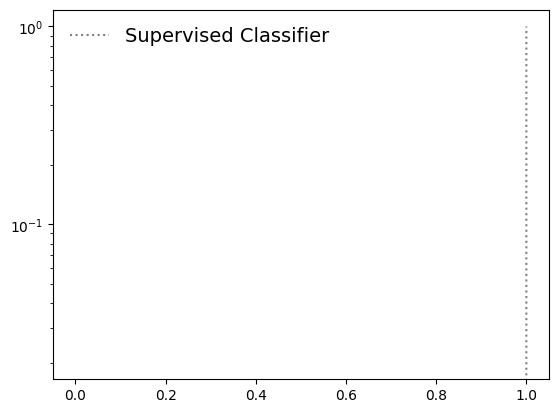

In [86]:
fpr, tpr, _ = roc_curve(y_test,prediction_parts, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr, tpr)))
plt.plot(tpr,fpr,label="Supervised Classifier",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

In [ ]:
fpr, tpr, _ = roc_curve(Y,predictions, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr, tpr)))
plt.plot(tpr,fpr,label="Supervised Classifier",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

In [ ]:
import plt_new
labels_top,likelihoods_top = plt_new.evaluate_classifier(
                    3,
                    '../checkpoints_{}/checkpoint'.format('GSGM_class_gluon_tagging'),
                    '/pscratch/sd/n/nishank/data/TOPTAGGING/',
                )
fpr, tpr, _ = roc_curve(labels_top,likelihoods_top, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr, tpr)))
plt.plot(tpr,fpr,label="Supervised Classifier",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

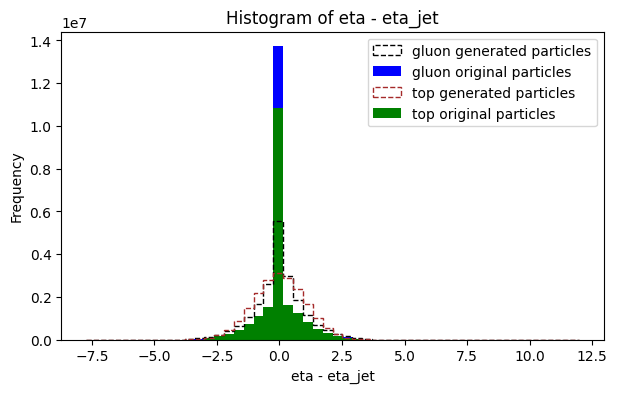

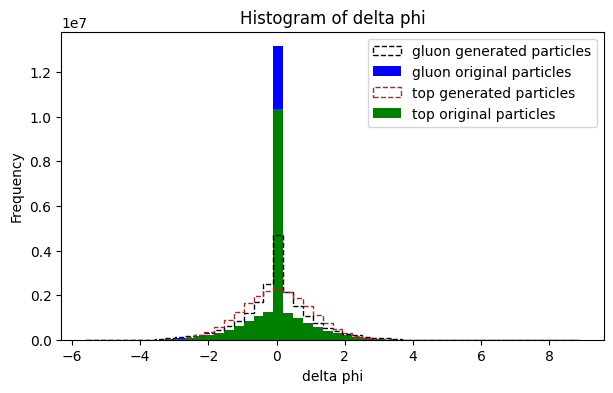

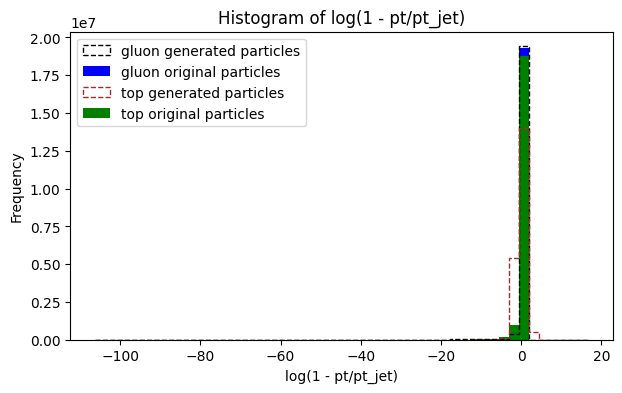

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you want to plot the histograms for the first feature
feature_names = ['eta - eta_jet', 'delta phi', 'log(1 - pt/pt_jet)']
featinds = [0, 1, 2]  # Change this index to match the feature you're interested in
for feature_idx in featinds:
    # Flatten the feature across all events and particles
    gluon_values = gluon_parts[:, :, feature_idx].flatten()
    real_gluon_values = real_gluon_particles[:, :, feature_idx].flatten()
    top_values = top_parts[:, :, feature_idx].flatten()
    real_top_values = real_top_particles[:, :, feature_idx].flatten()

    # Define the bin edges for the histograms
    bins = np.linspace(min(np.min(gluon_values), np.min(real_gluon_values), np.min(top_values), np.min(real_top_values)),
                       max(np.max(gluon_values), np.max(real_gluon_values), np.max(top_values), np.max(real_top_values)),
                       51)  # Change 51 to the number of bins you want

    # Plot settings
    alpha = 1  # Transparency for fill
    colors = ['black', 'blue', 'brown', 'green']
    labels = ['gluon generated particles', 'gluon original particles', 'top generated particles', 'top original particles']
    line_styles = ['--', '-', '--', '-']

    # Create the histogram plots
    plt.figure(figsize=(7, 4))

    plt.hist(gluon_values, bins=bins, alpha=alpha, color=colors[0], label=labels[0], histtype='step', linestyle=line_styles[0])
    plt.hist(real_gluon_values, bins=bins, alpha=alpha, color=colors[1], label=labels[1], histtype='stepfilled', linestyle=line_styles[1])
    plt.hist(top_values, bins=bins, alpha=alpha, color=colors[2], label=labels[2], histtype='step', linestyle=line_styles[2])
    plt.hist(real_top_values, bins=bins, alpha=alpha, color=colors[3], label=labels[3], histtype='stepfilled', linestyle=line_styles[3])

    # Add labels and title as necessary
    plt.xlabel(f'{feature_names[feature_idx]}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature_names[feature_idx]}')
    if feature_idx == 2:
        plt.legend(loc='upper left')
    else:
        plt.legend()
    plt.show()


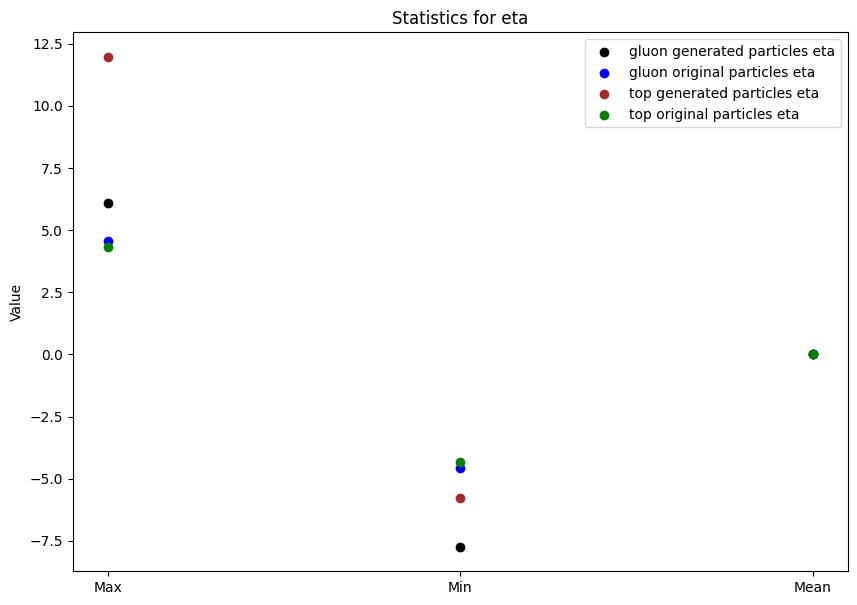

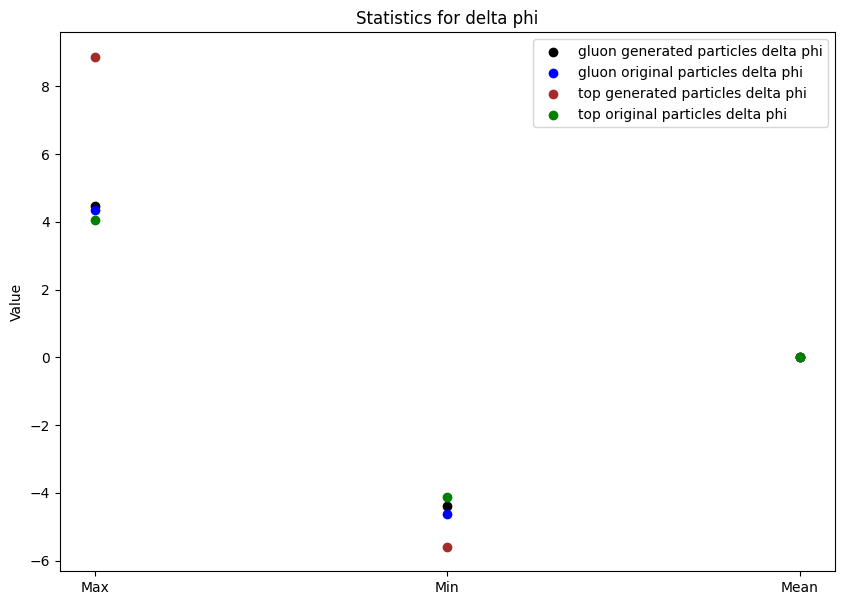

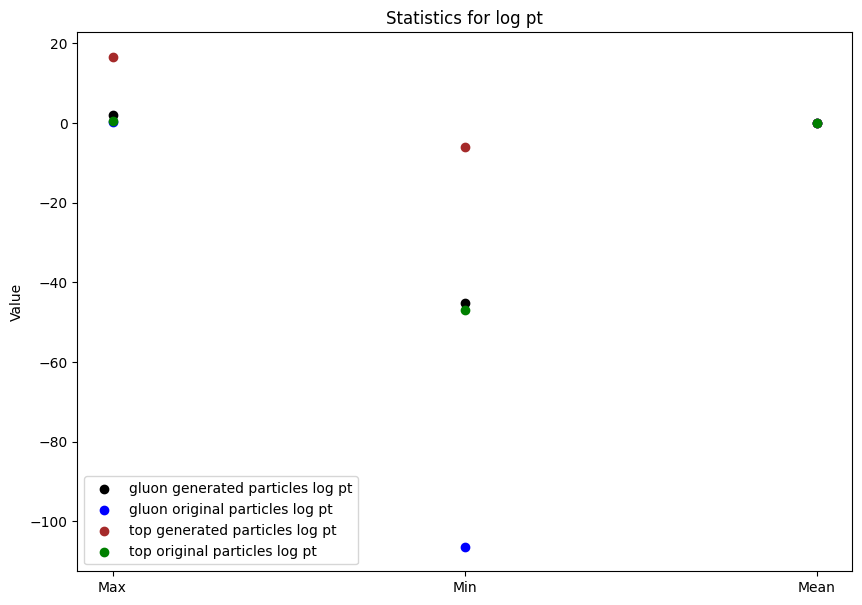

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Let's assume your data arrays are named gluon_parts, real_gluon_particles, top_parts, and real_top_particles.
# And let's assume they all have the same shape: (200000, 100, 3)

# First, calculate the statistics for each array
max_particle_gluon = np.max(gluon_parts, axis=(0, 1))
min_particle_gluon = np.min(gluon_parts, axis=(0, 1))
mean_particle_gluon = np.mean(gluon_parts, axis=(0, 1))
# Repeat for other arrays...

# Now, plot the statistics for each feature across the four arrays
feature_names = ['eta', 'delta phi', 'log pt']
arrays = [gluon_parts, real_gluon_particles, top_parts, real_top_particles]
colors = ['black', 'blue', 'brown', 'green']
array_labels = ['gluon generated particles', 'gluon original particles', 'top generated particles', 'top original particles']

# Plot max, min, mean for each feature
for idx, feature_name in enumerate(feature_names):
    plt.figure(figsize=(10, 7))
    for array, label, color in zip(arrays, array_labels, colors):
        max_particle = np.max(array, axis=(0, 1))[idx]
        min_particle = np.min(array, axis=(0, 1))[idx]
        mean_particle = np.mean(array, axis=(0, 1))[idx]

        # Plot the statistics
        plt.scatter([1, 2, 3], [max_particle, min_particle, mean_particle], color=color, label=f'{label} {feature_name}')

    plt.xticks([1, 2, 3], ['Max', 'Min', 'Mean'])
    plt.ylabel('Value')
    plt.title(f'Statistics for {feature_name}')
    plt.legend()
    plt.show()


In [ ]:
plt.hist(ll_gluon_jets, bins=50, range=(-30, 0), alpha=0.7, label= 'data')
plt.xlabel('likelihoods')
plt.ylabel('Number of Events')
plt.title('ll gluon jets')
plt.legend()
plt.show()
plt.hist(ll_top_jets, bins=50, range=(-30, 0), alpha=0.7, label='data')
plt.xlabel('likelihoods')
plt.ylabel('Number of Events')
plt.title('ll top jets')
plt.legend()
plt.show()
plt.hist(ll_gluon_jets - ll_top_jets, bins=50, range=(-5, 15), alpha=0.7, label= 'data')
plt.xlabel('likelihoods')
plt.ylabel('Number of Events')
plt.title('ll gluon jets')
plt.legend()
plt.show()

In [ ]:
plt.hist(ll_gluon_jets_top, bins=50, range=(-30, 0), alpha=0.7, label= 'data')
plt.xlabel('likelihoods')
plt.ylabel('Number of Events')
plt.title('ll gluon jets with top data')
plt.legend()
plt.show()
plt.hist(ll_top_jets_top, bins=50, range=(-30, 0), alpha=0.7, label='data')
plt.xlabel('likelihoods')
plt.ylabel('Number of Events')
plt.title('ll top jets with top data')
plt.legend()
plt.show()
plt.hist(ll_gluon_jets_top - ll_top_jets_top, bins=50, range=(-5, 15), alpha=0.7, label= 'data')
plt.xlabel('likelihoods')
plt.ylabel('Number of Events')
plt.title('ll gluon jets with top data')
plt.legend()
plt.show()

In [ ]:
import utils

data_particles, data_jets, _ = utils.DataLoader('/pscratch/sd/n/nishank/data/TOPTAGGING',
                                                     ['gluon_tagging.h5'],'gluon_tagging', use_train = False, make_tf_data=False)

In [ ]:
plt.hist(data_jets[:,0], bins=50, range=(-2, 2), alpha=0.7, color='blue', label='data jets')
plt.hist(gluon_jets[:,0], bins=50, range=(-2, 2), alpha=0.7, color='red', label='generated jets')
plt.xlabel('pt')
plt.ylabel('Number of Events')
plt.title('Histogram of pt')
plt.legend()
plt.show()
plt.hist(data_jets[:,1], bins=50, range=(-3, 3), alpha=0.7, color='blue', label='data jets')
plt.hist(gluon_jets[:,1], bins=50, range=(-3, 3), alpha=0.7, color='red', label='generated jets')
plt.xlabel('eta')
plt.ylabel('Number of Events')
plt.title('histogram of eta')
plt.legend()
plt.show()
plt.hist(data_jets[:,2], bins=50, range=(-10, 10), alpha=0.7, color='blue', label='data jets')
plt.hist(gluon_jets[:,2], bins=50, range=(-10, 10), alpha=0.7, color='red', label='generated jets')
plt.xlabel('mass')
plt.ylabel('Number of Events')
plt.title('histogram of mass')
plt.legend()
plt.show()
plt.hist(data_jets[:,3], bins=50, range=(-7, 7), alpha=0.7, color='blue', label='data jets')
plt.hist(gluon_jets[:,3], bins=50, range=(-7, 7), alpha=0.7, color='red', label='generated jets')
plt.xlabel('parts')
plt.ylabel('Number of Events')
plt.title('histogram of parts')
plt.legend()
plt.show()

In [ ]:
data_contents, bins_data ,  _ = plt.hist(data_jets[:,0], bins=50, range=(-2, 2), alpha=0.7, label='pt')
plt.xlabel('pt')
plt.ylabel('Number of Events')
plt.title('histogram of pt')
plt.legend()
plt.show()
gen_contents, bins_gen ,  _ = plt.hist(gluon_jets[:,0], bins=50, range=(-2, 2), alpha=0.7, label='pt')
plt.xlabel('pt')
plt.ylabel('Number of Events')
plt.title('histogram of pt')
plt.legend()
plt.show()
bins = 0.5*(bins_gen[:-1] + bins_gen[1:])
print(bins_gen.shape, np.ma.divide(data_contents,gen_contents).filled(0).shape)
print(np.ma.divide(data_contents,gen_contents).filled(0))
#plt.plot(np.ma.divide(data_contents,gen_contents).filled(0))
overx = np.ma.divide(1,gen_contents).filled(0)
overy = np.ma.divide(1,data_contents).filled(0)
yerr = np.ma.divide(data_contents,gen_contents).filled(0) * np.sqrt(overx + overy)
plt.errorbar(bins, np.ma.divide(data_contents,gen_contents).filled(0), yerr=yerr)
plt.xlabel('pt')
plt.ylabel('Number of Events')
plt.title('histogram of pt rk45 1e-6')
plt.legend()
plt.show()

In [ ]:
data_contents, bins_data ,  _ = plt.hist(data_jets[:,1], bins=50, range=(-2.5, 2.5), alpha=0.7, label='pt')
plt.xlabel('eta')
plt.ylabel('Number of Events')
plt.title('histogram of eta')
plt.legend()
plt.show()
gen_contents, bins_gen ,  _ = plt.hist(gluon_jets[:,1], bins=50, range=(-2.5, 2.5), alpha=0.7, label='pt')
plt.xlabel('eta')
plt.ylabel('Number of Events')
plt.title('histogram of eta')
plt.legend()
plt.show()
bins = 0.5*(bins_gen[:-1] + bins_gen[1:])
print(bins_gen.shape, np.ma.divide(data_contents,gen_contents).filled(0).shape)
print(np.ma.divide(data_contents,gen_contents).filled(0))
#plt.plot(np.ma.divide(data_contents,gen_contents).filled(0))
overx = np.ma.divide(1,gen_contents).filled(0)
overy = np.ma.divide(1,data_contents).filled(0)
yerr = np.ma.divide(data_contents,gen_contents).filled(0) * np.sqrt(overx + overy)
plt.errorbar(bins, np.ma.divide(data_contents,gen_contents).filled(0), yerr=yerr)
plt.xlabel('eta')
plt.ylabel('Number of Events')
plt.title('histogram of eta rk45 1e-6')
plt.legend()
plt.show()



In [ ]:
data_contents, bins_data ,  _ = plt.hist(data_jets[:,2], bins=50, range=(-10, 10), alpha=0.7, label='pt')
plt.xlabel('mass')
plt.ylabel('Number of Events')
plt.title('histogram of mass')
plt.legend()
plt.show()
gen_contents, bins_gen ,  _ = plt.hist(gluon_jets[:,2], bins=50, range=(-10, 10), alpha=0.7, label='pt')
plt.xlabel('mass')
plt.ylabel('Number of Events')
plt.title('histogram of mass')
plt.legend()
plt.show()
bins = 0.5*(bins_gen[:-1] + bins_gen[1:])
print(bins_gen.shape, np.ma.divide(data_contents,gen_contents).filled(0).shape)
print(np.ma.divide(data_contents,gen_contents).filled(0))
#plt.plot(np.ma.divide(data_contents,gen_contents).filled(0))
overx = np.ma.divide(1,gen_contents).filled(0)
overy = np.ma.divide(1,data_contents).filled(0)
yerr = np.ma.divide(data_contents,gen_contents).filled(0) * np.sqrt(overx + overy)
plt.errorbar(bins, np.ma.divide(data_contents,gen_contents).filled(0), yerr=yerr)
plt.xlabel('mass')
plt.ylabel('Number of Events')
plt.title('histogram of mass rk45 1e-6')
plt.legend()
plt.show()

In [ ]:
data_contents, bins_data ,  _ = plt.hist(data_jets[:,3], bins=50, range=(-10, 10), alpha=0.7, label='pt')
plt.xlabel('parts')
plt.ylabel('Number of Events')
plt.title('histogram of parts')
plt.legend()
plt.show()
gen_contents, bins_gen ,  _ = plt.hist(gluon_jets[:,3], bins=50, range=(-10, 10), alpha=0.7, label='pt')
plt.xlabel('parts')
plt.ylabel('Number of Events')
plt.title('histogram of parts')
plt.legend()
plt.show()
bins = 0.5*(bins_gen[:-1] + bins_gen[1:])
print(bins_gen.shape, np.ma.divide(data_contents,gen_contents).filled(0).shape)
print(np.ma.divide(data_contents,gen_contents).filled(0))
#plt.plot(np.ma.divide(data_contents,gen_contents).filled(0))
overx = np.ma.divide(1,gen_contents).filled(0)
overy = np.ma.divide(1,data_contents).filled(0)
yerr = np.ma.divide(data_contents,gen_contents).filled(0) * np.sqrt(overx + overy)
plt.errorbar(bins, np.ma.divide(data_contents,gen_contents).filled(0), yerr=yerr)
plt.xlabel('parts')
plt.ylabel('Number of Events')
plt.title('histogram of parts rk45 1e-6')
plt.legend()
plt.show()

In [ ]:
#OLD CELLS AFTER THIS

In [ ]:
plt.hist(final_noise_jets.flatten(), bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of Final Jet Noise')
plt.legend()
plt.show()

plt.hist(final_noise_jets[:,0], bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of Final Jet Momentum Noise')
plt.legend()
plt.show()
plt.hist(final_noise_jets[:,1], bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of Final Jet Eta Noise')
plt.legend()
plt.show()
plt.hist(final_noise_jets[:,2], bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of Final Jet Mass Noise')
plt.legend()
plt.show()
plt.hist(final_noise_jets[:,3], bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of Final Jet Sum Noise')
plt.legend()
plt.show()

In [ ]:
plt.hist(init_noise_jets[:,0], bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of init Jet Momentum Noise')
plt.legend()
plt.show()
plt.hist(init_noise_jets[:,1], bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of init Jet Eta Noise')
plt.legend()
plt.show()
plt.hist(init_noise_jets[:,2], bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of init Jet Mass Noise')
plt.legend()
plt.show()
plt.hist(init_noise_jets[:,3], bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of init Jet Sum Noise')
plt.legend()
plt.show()

In [ ]:
print(final_noise_parts)

In [ ]:
print(init_noise_jets)

In [ ]:
print(final_noise_jets)

In [ ]:
in_part_flat = init_noise_parts.numpy().flatten()
fin_part_flat = final_noise_parts.flatten()
part_noise_diff = in_part_flat - fin_part_flat

plt.hist(part_noise_diff, bins=50, alpha=0.7, label='Particle Noise Difference')
plt.xlabel('Noise Difference')
plt.ylabel('Number of Events')
plt.title('Histogram of Particle Noise Difference')
plt.legend()
plt.show()

mean_initial = np.mean(in_part_flat)
std_initial = np.std(in_part_flat)
mean_final = np.mean(fin_part_flat)
std_final = np.std(fin_part_flat)
mean_diff = np.mean(part_noise_diff)
std_diff = np.std(part_noise_diff)

print("Initial Particle Noise: Mean = {:.2f}, Std Dev = {:.2f}".format(mean_initial, std_initial))
print("Final Particle Noise: Mean = {:.2f}, Std Dev = {:.2f}".format(mean_final, std_final))
print("Particle Noise Difference: Mean = {:.2f}, Std Dev = {:.2f}".format(mean_diff, std_diff))


In [ ]:
jet_noise_diff_pt = init_noise_jets[:,0] - final_noise_jets[:,0]
jet_noise_diff_eta = init_noise_jets[:,1] - final_noise_jets[:,1]
jet_noise_diff_mass = init_noise_jets[:,2] - final_noise_jets[:,2]
jet_noise_diff_sum = init_noise_jets[:,3] - final_noise_jets[:,3]

plt.hist(jet_noise_diff_pt, bins=50, alpha=0.7, label='Jet Noise Difference')
plt.xlabel('Noise Difference')
plt.ylabel('Number of Events')
plt.title('Histogram of Jet Noise Difference pt')
plt.legend()
plt.show()

plt.hist(jet_noise_diff_eta, bins=50, alpha=0.7, label='Jet Noise Difference')
plt.xlabel('Noise Difference')
plt.ylabel('Number of Events')
plt.title('Histogram of Jet Noise Difference eta')
plt.legend()
plt.show()

plt.hist(jet_noise_diff_mass, bins=50, alpha=0.7, label='Jet Noise Difference')
plt.xlabel('Noise Difference')
plt.ylabel('Number of Events')
plt.title('Histogram of Jet Noise Difference mass')
plt.legend()
plt.show()

plt.hist(jet_noise_diff_sum, bins=50, alpha=0.7, label='Jet Noise Difference')
plt.xlabel('Noise Difference')
plt.ylabel('Number of Events')
plt.title('Histogram of Jet Noise Difference sum')
plt.legend()
plt.show()

mean_initial_jet = np.mean(in_jet_flat)
std_initial_jet = np.std(in_jet_flat)
mean_final_jet = np.mean(fin_jet_flat)
std_final_jet = np.std(fin_jet_flat)
mean_diff_jet = np.mean(jet_noise_diff)
std_diff_jet = np.std(jet_noise_diff)

print("Initial Jet Noise: Mean = {:.2f}, Std Dev = {:.2f}".format(mean_initial_jet, std_initial_jet))
print("Final Jet Noise: Mean = {:.2f}, Std Dev = {:.2f}".format(mean_final_jet, std_final_jet))
print("Jet Noise Difference: Mean = {:.2f}, Std Dev = {:.2f}".format(mean_diff_jet, std_diff_jet))
